# Task 2 : Prediction using Unsupervised ML

#### Objective: From the givin 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load Iris.csv into a pandas dataframe.
iris= pd.read_csv("Iris.csv")

In [9]:
print(iris.shape)

(150, 6)


In [10]:
#Columns names in our dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
# (Q) How many data points for each class sre present ?
# OR  How many flowers for each species are present ?

iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 2-D Scatter PLot

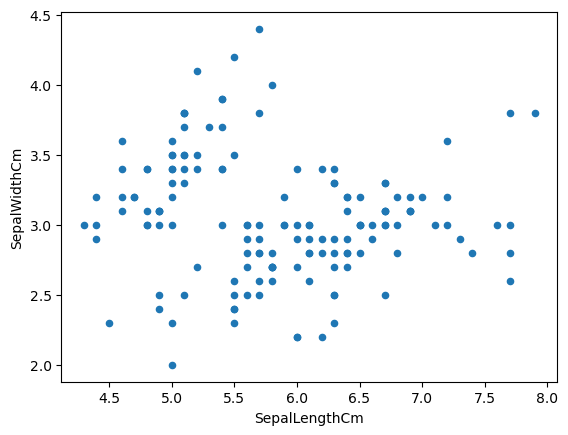

In [15]:
iris.plot(kind="scatter", x='SepalLengthCm', y='SepalWidthCm');
plt.show()

C:\Users\asud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


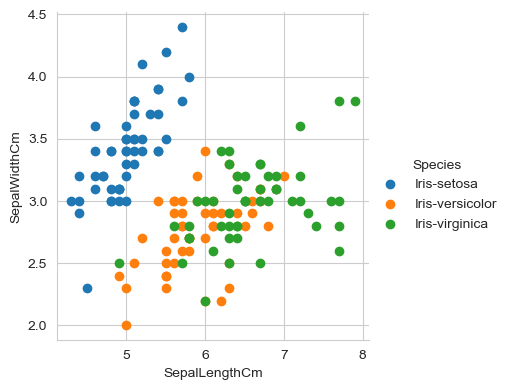

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

In [13]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Observation(S):
     
     1. Useing SepalLengthCm' and SepalWidthCm features,We can distinguish setosa flowers from others.
     2. Seperating versicolor from Vignica is much harder as they have considerable overlap.

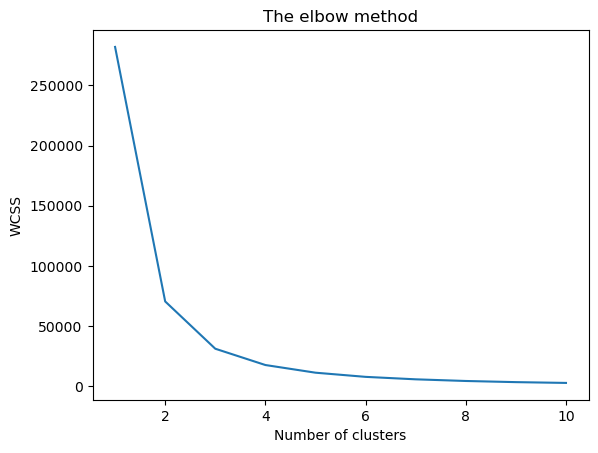

In [14]:
# Finding the optimum number of clusters for k-means classification 

x= iris.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
WCSS = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init ='k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
# Plotting the results onto a line graph,
# Allowing us to observe 'The elbow'
plt.plot(range(1,11), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### You can clearly see why it is called 'The elbow method ' from the above graph, the optimum cluters is where the elbow occures this is when the cluster sum of squres (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'

In [18]:
# Applying kmeans to the dataset / Creating the kmeans classifier 

kmeans = KMeans(n_clusters =3, init = 'k-means++',
               max_iter =300, n_init =10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

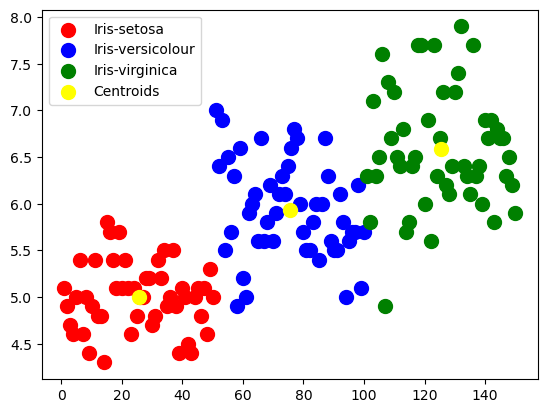

In [21]:
# Visualising the clusters - on the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],
           s = 100,c = 'red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],
           s = 100,c = 'blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100,c = 'green', label = 'Iris-virginica')

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label='Centroids')
plt.legend()